# Distributions

*SG2227 Saleh Rezaeiravesh and Philipp Schlatter*

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import math as mt
from scipy import special
from scipy import stats
from scipy.stats import chi2,gaussian_kde

π = mt.pi

## Common distributions

Let us use the Python lambda functions to define a few distributions (as examples):

In [2]:
# let's define some distributions. Note that all these are also available from:
# from scipy.stats import norm, lognormal, uniform
# The functions from scipy should be used, the ones here are merely for demonstration purposes.

gauss_pdf = lambda x,μ,σ: 1/(σ * np.sqrt(2 * π)) * np.exp(-(x-μ)**2 / (2*σ**2))
gauss_cdf = lambda x,μ,σ: (special.erf((x-μ)/σ/np.sqrt(2))+1)/2

lognormal_pdf = lambda x,μ,σ: 1/(x*σ*np.sqrt(2 * π)) * np.exp(-(np.log(x)-μ)**2 / (2*σ**2))
lognormal_cdf = lambda x,μ,σ: (special.erf((np.log(x)-μ)/σ/np.sqrt(2))+1)/2

uniform_pdf = lambda x: (np.logical_and((x>=0),(x<=1)))*1
uniform_cdf = lambda x: np.minimum((x>=0)*x,1)

### 1. Uniform distribution

The uniform distribution in the range $(0,1)$ has a unit pdf and a linearly increasing cfd, with a mean of 0.5 and a variance of $\sigma^2 = 1/12$.

In [3]:
N = 40000
x = np.arange(N)
y = np.random.random_sample((N,))

<IPython.core.display.Javascript object>


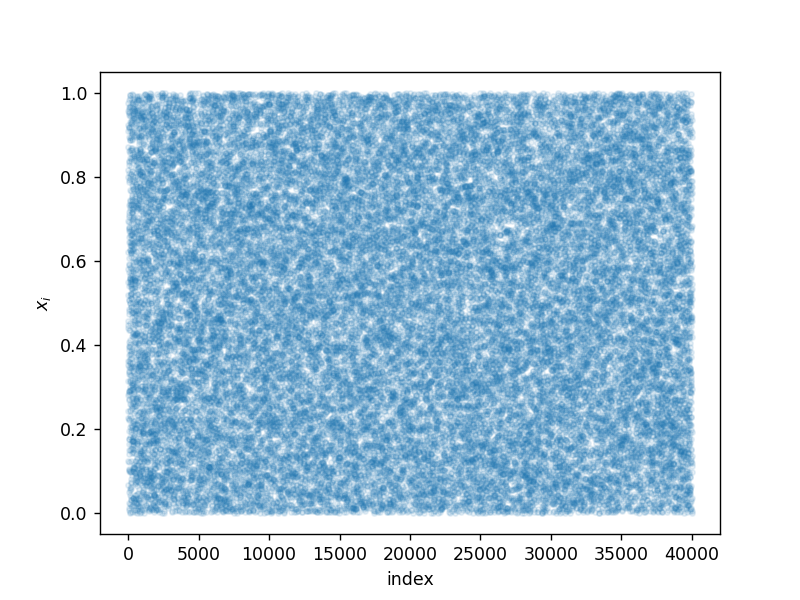

In [4]:
plt.figure()
plt.plot(x,y,'.',alpha=0.1)
plt.xlabel('index');plt.ylabel('$x_i$')
plt.show()

<IPython.core.display.Javascript object>


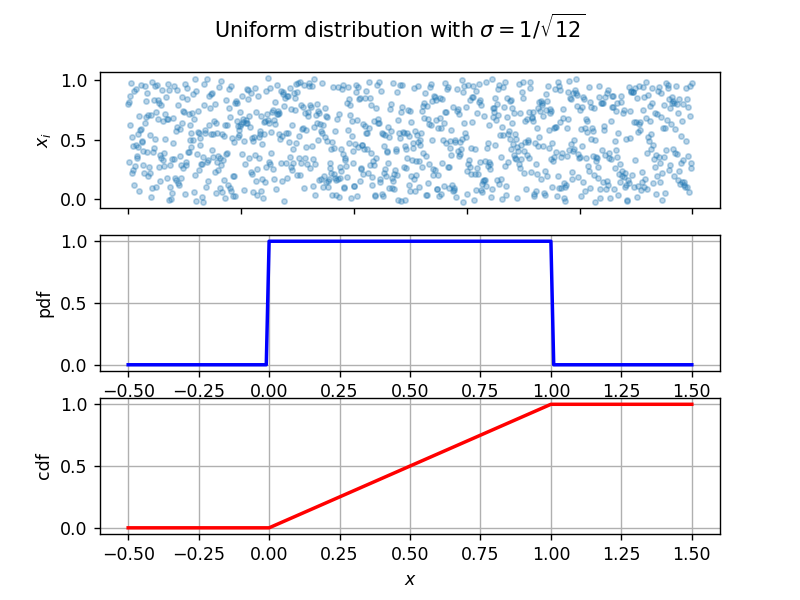

[0.5058069585848688, 0.0856250496398509]

In [5]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
fig.suptitle(r'Uniform distribution with $\sigma=1/\sqrt{12}$')

xx = np.linspace(-10,10,500)
yn=np.interp(y[0:1000],uniform_cdf(xx),xx)
ax1.plot(yn,'.',alpha=0.3)
ax1.set_ylabel('$x_i$')
ax1.set(xticklabels=[])  

x=np.linspace(-0.5,1.5,201)
ax2.plot(x, uniform_pdf(x) , linewidth=2, color='b',label='pdf')
ax2.set_ylabel('pdf')
ax2.grid()

ax3.plot(x, uniform_cdf(x), linewidth=2, color='r',linestyle='-',label='cfd')
ax3.set_xlabel('$x$')
ax3.set_ylabel('cdf')
ax3.grid()

plt.show()
[np.mean(yn),np.var(yn)]

The analytical values of the uniform distribution for the mean $\mu$ and the variance $\sigma^2$ are $1/2=0.5$ and $1/12\approx 0.08333$. These values can be obtained from the samples or from the pdf:

In [6]:
np.mean(y),np.var(y, ddof=0)

(0.5037002474459076, 0.08270337896798524)

In [7]:
xx = np.linspace(-10,10,500)
mu = np.trapz(uniform_pdf(xx)*xx,xx)
var= np.trapz(uniform_pdf(xx)*(xx-mu)**2,xx)
mu,var

(0.5020060160400959, 0.08370221353630508)

Let us calculate a histogram:

<IPython.core.display.Javascript object>


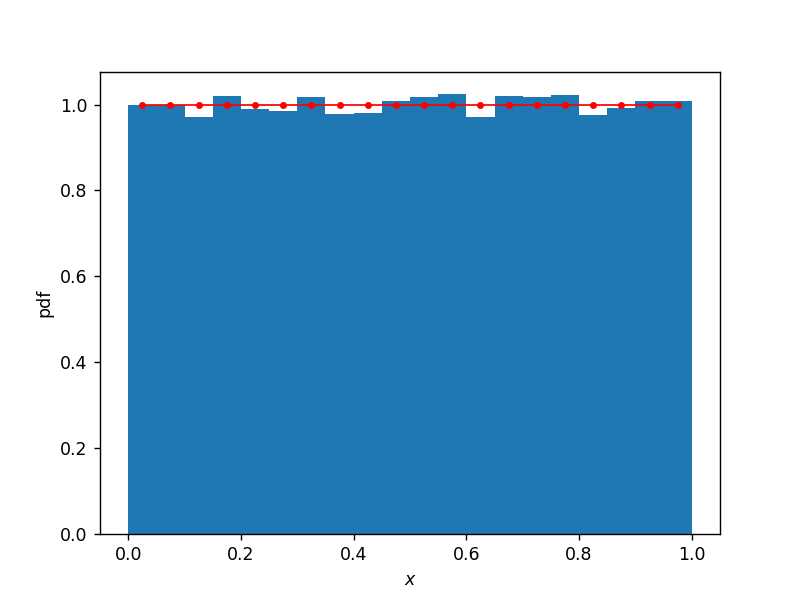

In [54]:
#nbins = int(np.sqrt(y.size))  # number of bins
nbins = 20

plt.figure()
count, bins, ignored = plt.hist(y, nbins, density=True)
#count, bins = np.histogram(y, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, uniform_pdf(bc), '.-',linewidth=1, color='r')
plt.xlabel('$x$');plt.ylabel('pdf')
plt.show()

Comment on the `hist` and `histogram` methods: `nbins` is the number of bins, going from the minimum to the maximum of the data. The output `bins` lists all the edges of the bins, and is thus of size `nbins`+1. `count` is of size `nbins`.

You can also manually construct the histogram:

<IPython.core.display.Javascript object>


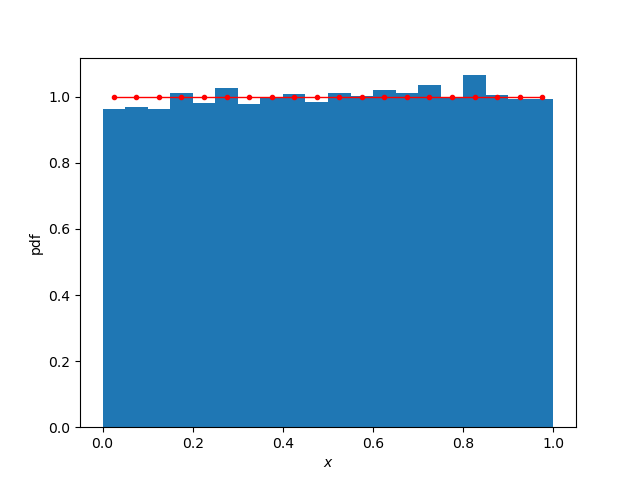

In [9]:
nbins = 20  # number of bins

plt.figure()
count, bins = np.histogram(y, nbins, density=True)
bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)
plt.bar(bc,count,width=db,color='#1f77b4')

plt.plot(bc, uniform_pdf(bc), '.-',linewidth=1, color='r')
plt.xlabel('$x$');plt.ylabel('pdf')
plt.show()

Instead of a histogram, one can do *Kernel Density Estimation (KDE)*:
$$ \hat{f}_h = \frac{1}{N}\sum_{i=1}^N K_h(x-x_i) $$
with a specific kernel $K_h$. Typically a Gaussian is used, as in the following example. Note that the bandwith $h$ leads to a smoothing of discontinuous parts of the distribution.

<IPython.core.display.Javascript object>


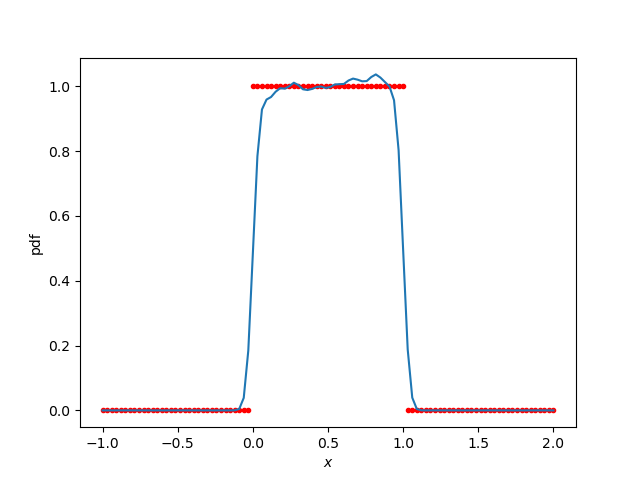

In [10]:
kernel=gaussian_kde(y)
x_pts=np.linspace(-1,2,100)
estimated_pdf = kernel.evaluate(x_pts)

plt.figure()
plt.plot(x_pts, uniform_pdf(x_pts), '.',linewidth=1, color='r')
plt.plot(x_pts,estimated_pdf)
plt.xlabel('$x$')
plt.ylabel('pdf')
plt.show()

## Hands-on:
1. Plot the pdf, cfd, samples and a histogram for the uniform distribution
2. compute the mean and variance from the samples and from the distribution
3. Plot the *error* of the sample mean and variance as function of $n$ (the sample size).
---
---
---
---
---
---
---
---


Demonstration of the Law of Large Numbers (LLN) and the central limit theorem (CLT):

<IPython.core.display.Javascript object>


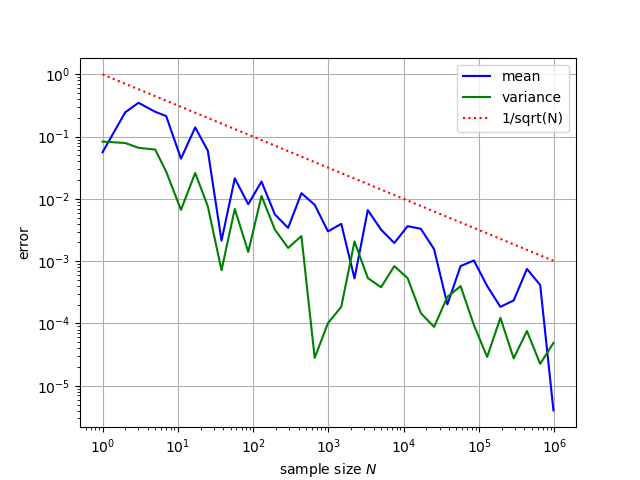

In [11]:
Ne = 34
mm = np.zeros(Ne)
vv = np.zeros(Ne)
xx = np.zeros(Ne)
for i in range(Ne):
    pp = int(1.5**(i+1))
    xx[i] = pp
    ss = np.random.random_sample((pp,))
    mm[i] = abs(np.mean(ss)-0.5)
    vv[i] = np.var(ss)
    
plt.figure()
plt.loglog(xx,mm,'b',label='mean')
plt.loglog(xx,abs(vv-1/12),'g',label='variance')
plt.loglog(xx,1/np.sqrt(xx),'r:',label='1/sqrt(N)')
plt.grid('on')
plt.xlabel('sample size $N$');plt.ylabel('error')
plt.legend()
plt.show()

### 2. Normal distribution

The normal distribution has the following functional form:
$$ pdf(x,\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left( \frac{-(x-\mu)^2}{2\sigma^2 } \right) $$

<IPython.core.display.Javascript object>


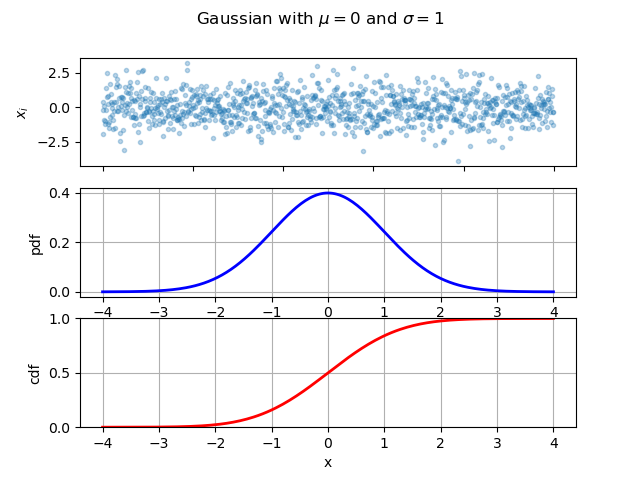

[-0.008280845282020468, 1.0977483110951285]

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
fig.suptitle(r'Gaussian with $\mu=0$ and $\sigma=1$')

xx = np.linspace(-10,10,500)
yn=np.interp(y[0:1000],gauss_cdf(xx,0,1),xx)
ax1.plot(yn,'.',alpha=0.3)
ax1.set_ylabel('$x_i$')
ax1.set(xticklabels=[])  

x=np.linspace(-4,4,201)
ax2.plot(x, gauss_pdf(x,0,1) , linewidth=2, color='b',label='pdf')
ax2.set_ylabel('pdf')
ax2.grid()

ax3.plot(x, gauss_cdf(x,0,1), linewidth=2, color='r',linestyle='-',label='cfd')
ax3.set_xlabel('x')
ax3.set_ylabel('cdf')
ax3.set_ylim(0,1)
ax3.grid()

plt.show()
[np.mean(yn),np.var(yn)]

For instance, the value of $cdf=0.025$ is reached at $x=-1.96$, and $cdf=0.975$ at $x=1.96$.

<IPython.core.display.Javascript object>


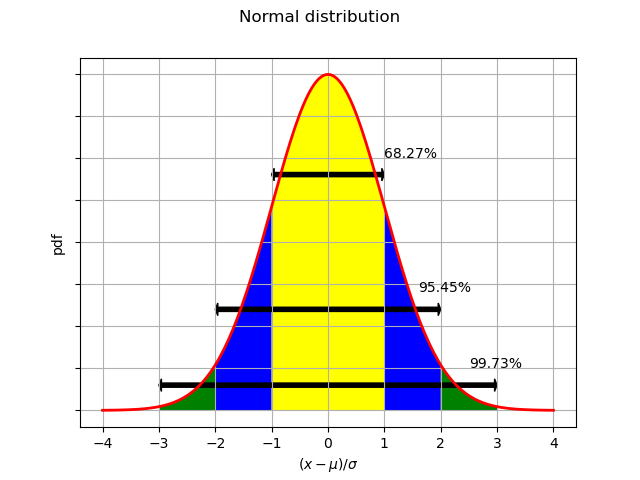

(0.6826894921370859, 0.9544997361036416, 0.9973002039367398)

In [13]:
fig,ax = plt.subplots(1,1)
fig.suptitle(r'Normal distribution')
x=np.linspace(-3,-2,100)
ax.fill_between(x,0,gauss_pdf(x,0,1),facecolor='green')
x=np.linspace(-2,-1,100)
ax.fill_between(x,0,gauss_pdf(x,0,1),facecolor='blue')
x=np.linspace(-1,1,100)
ax.fill_between(x,0,gauss_pdf(x,0,1),facecolor='yellow')
x=np.linspace(1,2,100)
ax.fill_between(x,0,gauss_pdf(x,0,1),facecolor='blue')
x=np.linspace(2,3,100)
ax.fill_between(x,0,gauss_pdf(x,0,1),facecolor='green')

x=np.linspace(-4,4,201)
ax.plot(x, gauss_pdf(x,0,1) , linewidth=2, color='r',label='pdf')
ax.set_ylabel('pdf')
ax.set_xlabel('$(x-\mu)/\sigma$')
ax.grid()
ax.set(yticklabels=[]) 
plt.text(1,0.3,'68.27%')
plt.text(1.6,0.14,'95.45%')
plt.text(2.5,0.05,'99.73%')
arr_width=0.005
ax.arrow(0, 0.28, 1,0, linewidth=1, width = arr_width, head_width = 3 * arr_width, 
          head_length = 9 * arr_width,color='k', length_includes_head=True)
ax.arrow(0, 0.28, -1,0, linewidth=1, width = arr_width, head_width = 3 * arr_width, 
          head_length = 9 * arr_width,color='k', length_includes_head=True)
ax.arrow(0, 0.12, 2,0, linewidth=1, width = arr_width, head_width = 3 * arr_width, 
          head_length = 9 * arr_width,color='k', length_includes_head=True)
ax.arrow(0, 0.12, -2,0, linewidth=1, width = arr_width, head_width = 3 * arr_width, 
          head_length = 9 * arr_width,color='k', length_includes_head=True)
ax.arrow(0, 0.03, 3,0, linewidth=1, width = arr_width, head_width = 3 * arr_width, 
          head_length = 9 * arr_width,color='k', length_includes_head=True)
ax.arrow(0, 0.03, -3,0, linewidth=1, width = arr_width, head_width = 3 * arr_width, 
          head_length = 9 * arr_width,color='k', length_includes_head=True)
fig.show()
1-2*gauss_cdf(-1,0,1),1-2*gauss_cdf(-2,0,1),1-2*gauss_cdf(-3,0,1)

<IPython.core.display.Javascript object>


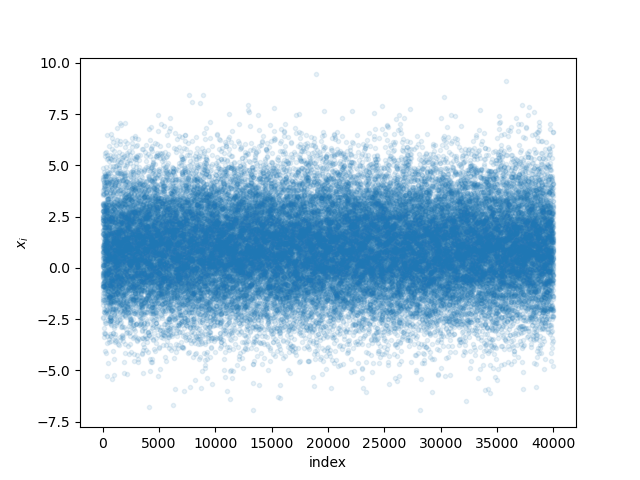

In [14]:
N = 40000
x = np.arange(N)
mu, sigma = 1, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, N)

plt.figure()
plt.plot(x,s,'.',alpha=0.1)
plt.xlabel('index');plt.ylabel('$x_i$')
plt.show()

In [15]:
[np.mean(s),np.std(s, ddof=1)]

[0.9970449119499175, 1.983800397225305]

<IPython.core.display.Javascript object>


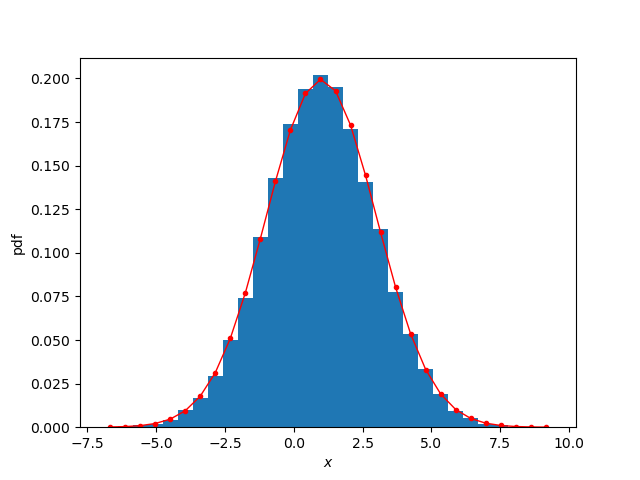

In [16]:
nbins = 30  # number of bins

plt.figure()
count, bins, ignored = plt.hist(s, nbins, density=True)
#count, bins = np.histogram(s, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, gauss_pdf(bc,mu,sigma), '.-',linewidth=1, color='r')
plt.xlabel('$x$');plt.ylabel('pdf')
plt.show()

<IPython.core.display.Javascript object>


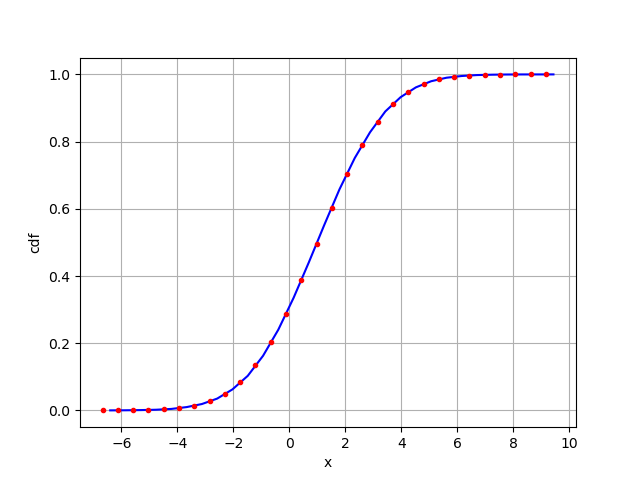

In [17]:
# compute the cumulative distribution function
cdf=np.cumsum(count*db)

plt.figure()
plt.plot(bins[1:],cdf,'b')
plt.plot(bc,gauss_cdf(bc,mu,sigma), '.',linewidth=2, color='r')
plt.xlabel('x')
plt.ylabel('cdf')
plt.grid()
plt.show()

We can use the (normalised) CFD to compute the relevant $z_\alpha$-values for an interval

$$P(-z_\alpha \leq z \leq z_\alpha) = \alpha = \frac{1}{\sqrt{2\pi}}\int_{-z_\alpha}^{z_\alpha} \exp\left(-\frac{u^2}{2}\right) \mathrm d u $$

using the inverse error function as

$$z_\alpha = \sqrt{2} \mathrm{erf}^{-1}(1-\alpha) \ .$$

For instance a $1-\alpha=95\%$ probability is obtained with $z_\alpha=1.96$:

In [8]:
α=0.05
z_α = np.sqrt(2)*special.erfinv(1-α)
z_α

1.9599639845400545

## Hands-on
1. plot the pdf and histogram
2. plot and compute the pdf of $x^2$ if $x\sim \mathcal{N}(0,1)$
---
---
---
---
---
---
---


### 3. Log-normal distribution

The log-normal distribution has a mean 
$$\exp(\mu+\sigma^2/2)$$ 
and a variance 
$$[\exp(\sigma^2) - 1 ] \exp(2\mu + \sigma^2). $$
Essentially, the logarithm of the random variable is normally distributed, $\ln(x_i) \sim \mathcal{N}(\mu, \sigma^2)$.

<IPython.core.display.Javascript object>


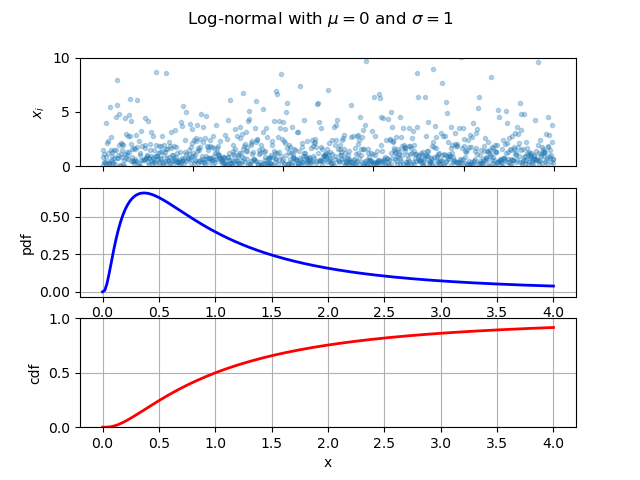

[1.7309184635067123, 5.5932888468553195, 4.055559495971185, 26.593732538448936]

In [19]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
fig.suptitle(r'Log-normal with $\mu=0$ and $\sigma=1$')

xx = np.linspace(0.0001,50,500)
yn=np.interp(y[0:1000],lognormal_cdf(xx,0,1),xx)
ax1.plot(yn,'.',alpha=0.3)
ax1.set_ylabel('$x_i$')
ax1.set_ylim(0,10)
ax1.set(xticklabels=[])  

x=np.linspace(0.0001,4,201)
ax2.plot(x, lognormal_pdf(x,0,1) , linewidth=2, color='b',label='pdf')
ax2.set_ylabel('pdf')
ax2.grid()

ax3.plot(x, lognormal_cdf(x,0,1), linewidth=2, color='r',linestyle='-',label='cfd')
ax3.set_xlabel('x')
ax3.set_ylabel('cdf')
ax3.set_ylim(0,1)
ax3.grid()

plt.show()
[np.mean(yn),np.var(yn),stats.skew(yn), stats.kurtosis(yn)+3]

In [71]:
np.exp(0.5),((np.exp(1)-1)*np.exp(1))

(1.6487212707001282, 4.670774270471604)

### 4. $\chi^2(k)$ distribution

mean is $k$ and variance $2k$.


<IPython.core.display.Javascript object>


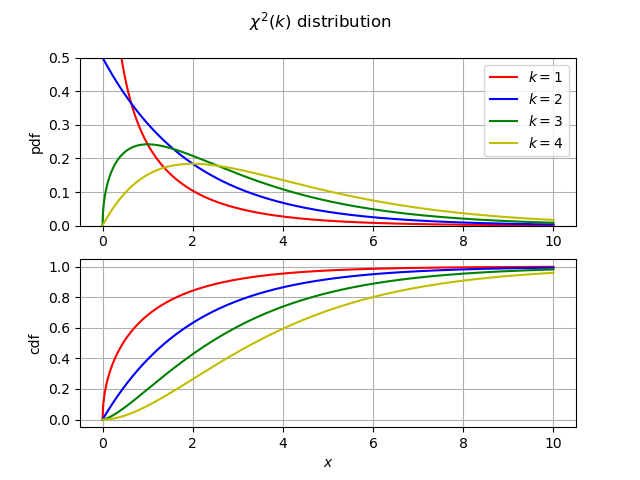

In [74]:
x = np.linspace(0,10, 1000)
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle(r'$\chi^2(k)$ distribution')

ax1.plot(x, chi2.pdf(x, 1),'r-', label='$k=1$')
ax2.plot(x, chi2.cdf(x, 1),'r-', label='$k=1$')
ax1.plot(x, chi2.pdf(x, 2),'b-', label='$k=2$')
ax2.plot(x, chi2.cdf(x, 2),'b-', label='$k=2$')
ax1.plot(x, chi2.pdf(x, 3),'g-', label='$k=3$')
ax2.plot(x, chi2.cdf(x, 3),'g-', label='$k=3$')
ax1.plot(x, chi2.pdf(x, 4),'y-', label='$k=4$')
ax2.plot(x, chi2.cdf(x, 4),'y-', label='$k=4$')
ax1.set_ylim(0,0.5)
ax1.legend()
ax1.grid()
ax2.grid()
ax2.set_xlabel('$x$')
ax2.set_ylabel('cdf')
ax1.set_ylabel('pdf')
fig.show()

### 5. Student's t-distribution

The Student's t-distribution is similar to the normal distribution, and arises by replacing the population variance with the sample variance, and thus allows for an estimation of the population mean. It is particularly useful when the sample size is low; for larger sample sizes it approaches the normal distribution. Without giving the formulas here, the distribution's mean is $0$ and its variance $\nu/(\nu-2)$ for $\nu>2$. As stated, the Student's-t distribution approaches the normal distribution $\mathcal{N}(0,1)$ for $\nu\rightarrow\infty$.


<IPython.core.display.Javascript object>


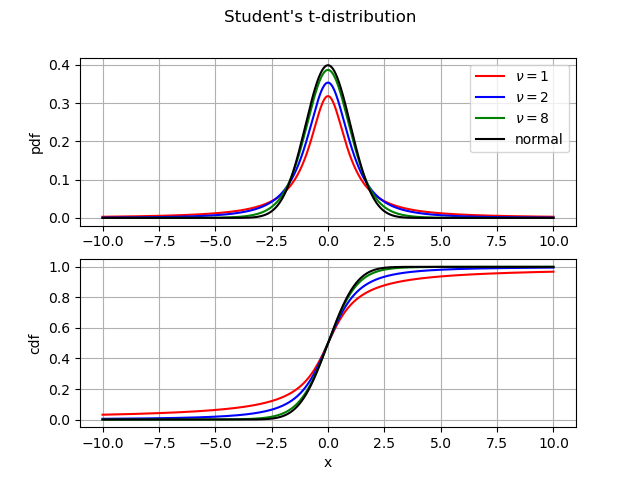

In [19]:
from scipy.stats import t

x = np.linspace(-10,10, 1000)
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle(r"Student's t-distribution")


ax1.plot(x, t.pdf(x, 1),'r-', label=r'$\nu=1$')
ax2.plot(x, t.cdf(x, 1),'r-', label=r'$\nu=1$')
ax1.plot(x, t.pdf(x, 2),'b-', label=r'$\nu=2$')
ax2.plot(x, t.cdf(x, 2),'b-', label=r'$\nu=2$')
ax1.plot(x, t.pdf(x, 8),'g-', label=r'$\nu=8$')
ax2.plot(x, t.cdf(x, 8),'g-', label=r'$\nu=8$')
ax1.plot(x, gauss_pdf(x, 0,1),'k-', label='normal')
ax2.plot(x, gauss_cdf(x, 0,1),'k-', label='normal')

ax1.grid()
ax2.grid()
ax1.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('cdf')
ax1.set_ylabel('pdf')
fig.show()

## Statistical moments

One can define the statistical moments of a distribution as
$$ \mu = \int_{x=-\infty}^\infty f(x) \mathrm dx \ , $$
$$ M^{(k)} = \int_{x=-\infty}^\infty (f(x) - \mu_1)^k \mathrm dx \ . $$
Of course $\mu$ is just the distribution mean, and $\sigma^2=M^{(2)}$ the variance around the mean.

The **skewness $S$** is the normalised third moment, defined as $M^{(3)}/\sigma^3$. Any symmetric distribution has $S=0$. A positive skew means that the tails on the right (positive) side are longer, i.e. the mass of the distribution if concentrated towards the left. Note that the distribution appears to be leaning to the left.

The **kurtosis $\kappa$** (or flatness $F$) is defined as the fourth moment $M^{(4)} / \sigma^4$. Since the kurtosis for the Gaussian distribution is 3, there is also a definition of the (excess) kurtosis $M^{(4)}/\sigma^4-3$. However, it is typically better to look at the bare normalised fourth moment. The kurtosis is a measure for the "tailedness" of a signal, as compared to the normal distribution at value 3. The kurtosis is measuring outliers, i.e. data that is located far from the centre, without making any distinction between positive and negative outliers (it is an even moment). 

A nonsymmetric distribution (such as the log-normal distribution) does have non-zero skewness.

In [569]:
N = 40000
x = np.arange(N)
mu, sigma = 1, 1 # mean and standard deviation
s = np.random.lognormal(mu, sigma, N)

mm = sum(s)/N
var=sum((s-mm)**2)/(N)
skew=sum((s-mm)**3)/(N)/var**(3/2)
flat=sum((s-mm)**4)/(N)/var**(4/2)
mm,var,skew,flat


(4.50209400849496, 36.18999270619271, 5.72726525366595, 65.82662706982974)

In [570]:
np.mean(s), np.var(s), stats.skew(s), stats.kurtosis(s)+3

(4.502094008494953, 36.18999270619234, 5.727265253666049, 65.82662706983072)

The normal distribution has the well-known values for the various moments as the mean $\mu$, the variance $\sigma^2$, the skewness $S=0$ and the kurtosis $\kappa=3$.

In [571]:
N = 40000
x = np.arange(N)
mu, sigma = 1, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, N)

mm = sum(s)/N
var=sum((s-mm)**2)/(N)
skew=sum((s-mm)**3)/(N)/var**(3/2)
flat=sum((s-mm)**4)/(N)/var**(4/2)
mm,var,skew,flat

(1.0102973687021224,
 3.963631311018131,
 -4.4076491482966775e-05,
 3.011190492808846)

In [572]:
np.mean(s), np.var(s), stats.skew(s), stats.kurtosis(s)+3

(1.0102973687021235,
 3.9636313110181494,
 -4.407649148443412e-05,
 3.01119049280879)

You can also construct the values of these estimators entirely based on the means of powers of the samples $x_i$.

Consider the variance estimator $\tilde{s}^2 = \hat{\mathbb{E}}[ (x_i-\hat{\mu})^2]$. This expression can be expanded as follows,

$$ \tilde{s}^2 = \hat{\mathbb{E}}[ (x_i-\hat{\mu})^2] = \hat{\mathbb{E}}[ x_i^2-2\hat{\mu} x_i + \hat{\mu}^2]  $$
$$=\hat{\mathbb{E}}[ x_i^2] - 2 \hat{\mu} \hat{\mathbb{E}}[ x_i] + \hat{\mathbb{E}}[\hat{\mu}^2] =\hat{\mathbb{E}}[ x_i^2] - 2 \hat{\mu}^2 + \hat{\mu}^2 = \hat{\mathbb{E}}[ x_i^2] -  \hat{\mu}^2 \ .  $$

Similar expansions also exist for other moments.

In [72]:
np.mean(s**2)-np.mean(s)**2

3.999769382366622

This is typically a convenient approach for collecting statistics on the fly, however for specific terms cancellation may be an issue.

## Draw samples from normal distribution

## Hands-on 

How would you draw samples from a distribution? Try this with a normal distribution $\mathcal{N}(0,1)$.

---
---
---
---
---
---
---
---


### Inverse sampling

This method is applicable to all distributions, however one needs to be careful with tails. Therefore, this method is not recommended for practical use except for some simple case. Other methods exists, such as rejection sampling, Latin-hypercube sampling or in case you do not even have the proper CDF the Metropolis-Hastings method.

In [51]:
N=50000
mu, sigma = 2,2
y = np.random.random_sample((N,))
xx = np.linspace(-20,20,500)
yn=np.interp(y,gauss_cdf(xx,mu,sigma),xx)

<IPython.core.display.Javascript object>


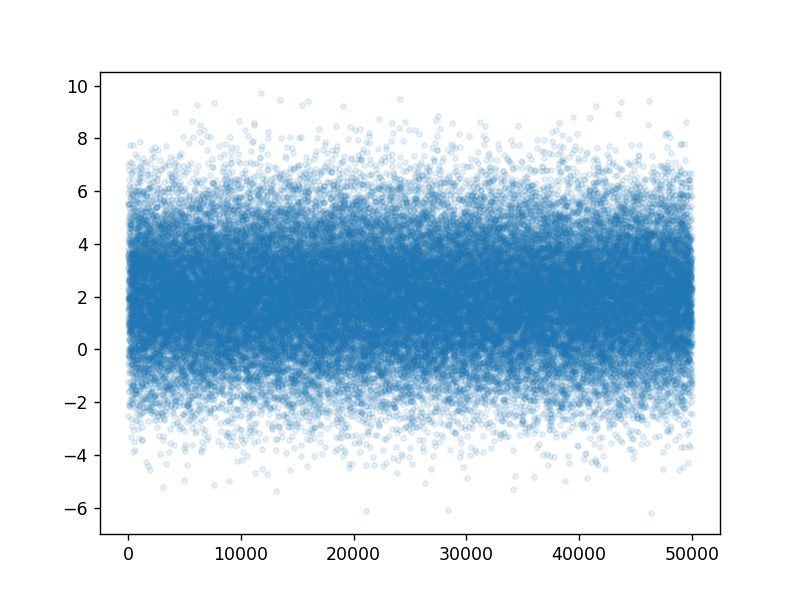

In [52]:
plt.figure()
plt.plot(yn,'.',alpha=0.1)
plt.show()

In [53]:
np.mean(yn), np.var(yn), stats.skew(yn), stats.kurtosis(yn)+3

(2.007546900383174,
 3.992205276926172,
 -0.0015269618380251294,
 2.9921703872079624)

### Box-Muller sampling

A more elaborate method is the Box-Muller sampling which directly produces two sequences of normally distributed variables.

In [43]:
# Box-Muller
mu = 2
sigma = 2

y1=np.random.random_sample((N,))
y2=np.random.random_sample((N,))
u1=mu+sigma*np.sqrt(-2*np.log(y1))*np.sin(2*π*y2)
u2=mu+sigma*np.sqrt(-2*np.log(y1))*np.cos(2*π*y2)

<IPython.core.display.Javascript object>


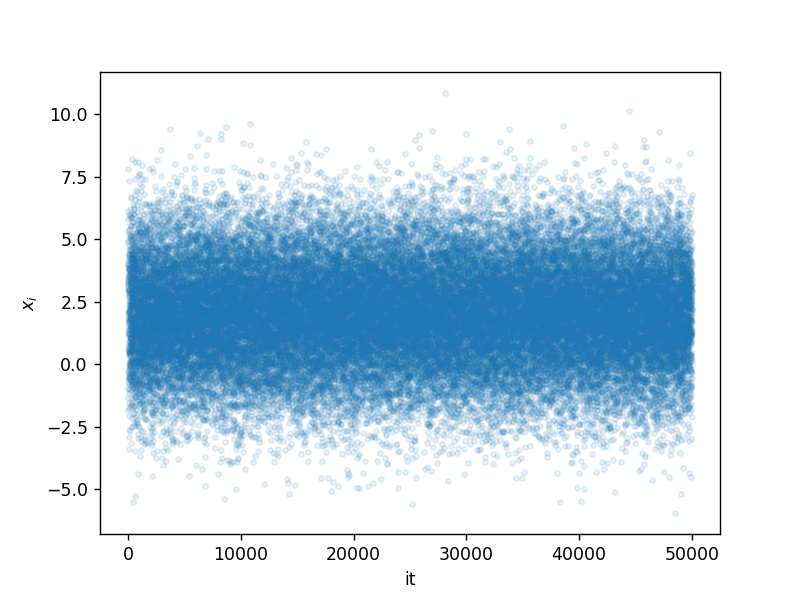

In [44]:
plt.figure()
plt.plot(u1,'.',alpha=0.1)
plt.xlabel('it');plt.ylabel('$x_i$')
plt.show()

In [45]:
np.mean(u1), np.var(u1), stats.skew(u1), stats.kurtosis(u1)+3

(2.011969239902809,
 4.0200256580296925,
 0.011032226562037634,
 2.9941307513683015)

In [47]:
np.mean(u2), np.var(u2), stats.skew(u2), stats.kurtosis(u2)+3

(2.001583958764907,
 3.980426396821583,
 -0.007470925067504366,
 2.9494352621591493)

The two variables `u1` and `u2` are independent (and identically distributed), as the covariance shows:

In [48]:
np.cov(u1,u2)

array([[ 4.02010606, -0.02804683],
       [-0.02804683,  3.98050601]])